In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime
import os

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
input_route = f"../../data/extras/countries_stocks.csv"
stock_data = pd.read_csv(input_route)
# optional filter
stock_data = stock_data

index = 13

stock_data.head(index+1)

,country,share_name,sector,industry,numbers_in_currency,currency_pair,status
0,norway,AFG.OL,Industrials,Engineering & Construction,NOK,NOK=X,OK
1,norway,AKRBP.OL,Energy,Oil & Gas E&P,USD,NOK=X,OK
2,norway,ATEA.OL,Technology,Information Technology Services,NOK,NOK=X,OK
3,norway,AUSS.OL,Consumer Defensive,Farm Products,NOK,NOK=X,OK
4,norway,BONHR.OL,Industrials,Conglomerates,NOK,NOK=X,OK
5,norway,BRG.OL,Basic Materials,Specialty Chemicals,NOK,NOK=X,OK
6,norway,DNO.OL,Energy,Oil & Gas E&P,USD,NOK=X,OK
7,norway,EPR.OL,Consumer Defensive,Discount Stores,NOK,NOK=X,OK
8,norway,EQNR.OL,Energy,Oil & Gas Integrated,USD,NOK=X,OK
9,norway,GSF.OL,Consumer Defensive,Farm Products,NOK,NOK=X,OK


In [3]:
evaluate_last_X_years = False
X=30
currency_pair = stock_data.currency_pair[index]
numbers_in_currency = stock_data.numbers_in_currency[index]
share_name = stock_data.share_name[index]
country = stock_data.country[index]

# 1.2. Raw input statement data

In [4]:
route = f"../../data/input/countries/{country}/{share_name}_data.csv"

data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)
data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2010-03-31,29,-13,16,5,22,24,10,57,0,...,7,0,0,17,0,20,-6,-3,168.74,2010-04-20
1,2010-06-30,42,-20,22,9,29,28,14,73,0,...,8,0,0,34,0,37,9,-2,168.74,2010-07-14
2,2010-09-30,35,-19,16,6,30,23,16,71,0,...,8,0,0,25,0,29,11,-1,168.74,2010-10-20
3,2010-12-31,35,-18,17,6,32,26,23,81,0,...,10,0,0,31,0,34,3,0,168.74,2011-02-04
4,2011-03-31,33,-18,15,5,20,30,28,81,0,...,7,0,0,25,0,28,-12,-1,167.62,2011-04-20


In [5]:
owned_shares = pd.read_csv('../../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [6]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2010-03-31,29,-13,16,5,22,24,10,57,0,...,7,0,0,17,0,20,-6,-3,168.74,2010-04-20
1,2010-06-30,42,-20,22,9,29,28,14,73,0,...,8,0,0,34,0,37,9,-2,168.74,2010-07-14
2,2010-09-30,35,-19,16,6,30,23,16,71,0,...,8,0,0,25,0,29,11,-1,168.74,2010-10-20
3,2010-12-31,35,-18,17,6,32,26,23,81,0,...,10,0,0,31,0,34,3,0,168.74,2011-02-04
4,2011-03-31,33,-18,15,5,20,30,28,81,0,...,7,0,0,25,0,28,-12,-1,167.62,2011-04-20


## Calculate date when quaterly reports could be available

In [7]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [8]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
52,2023-03-31,2023-04-20,192.79,145,-68,78,3,233,176,127,...,40,764,36,0,6,158,0,172,-130,-9
53,2023-06-30,2023-07-14,193.35,154,-72,82,16,252,158,148,...,43,806,41,0,78,169,0,197,32,-11
54,2023-09-30,2023-10-20,193.35,135,-67,68,1,229,160,158,...,45,791,36,0,9,151,0,179,-13,-8
55,2023-12-31,2024-02-04,193.35,108,-52,56,-12,291,133,163,...,58,862,12,0,10,114,0,260,-18,-20
56,2024-03-31,2024-04-22,193.75,75,-39,36,-33,235,103,198,...,59,820,14,0,10,105,0,246,-35,-6


## Pull historical average USD national currency rates and add to the dataframe

In [9]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
52,2023-03-31,2023-04-20,192.79,145,-68,78,3,233,176,127,...,764,36,0,6,158,0,172,-130,-9,10.221379
53,2023-06-30,2023-07-14,193.35,154,-72,82,16,252,158,148,...,806,41,0,78,169,0,197,32,-11,10.699984
54,2023-09-30,2023-10-20,193.35,135,-67,68,1,229,160,158,...,791,36,0,9,151,0,179,-13,-8,10.483742
55,2023-12-31,2024-02-04,193.35,108,-52,56,-12,291,133,163,...,862,12,0,10,114,0,260,-18,-20,10.821103
56,2024-03-31,2024-04-22,193.75,75,-39,36,-33,235,103,198,...,820,14,0,10,105,0,246,-35,-6,10.502364


## Convert USD values related to IS, BS, CFS to national currency

In [10]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
52,2023-03-31,2023-04-20,192.79,1482.099898,-695.053745,797.267532,30.664136,2381.581216,1798.962635,1298.115083,...,7809.133258,367.969630,0.0,61.328272,1614.977820,0.0,1758.077121,-1328.779219,-91.992407,10.221379
53,2023-06-30,2023-07-14,193.35,1647.797490,-770.398826,877.398663,171.199739,2696.395893,1690.597425,1583.597588,...,8624.186863,438.699332,0.0,834.598729,1808.297245,0.0,2107.896789,342.399478,-117.699821,10.699984
54,2023-09-30,2023-10-20,193.35,1415.305175,-702.410717,712.894459,10.483742,2400.776927,1677.398726,1656.431242,...,8292.639953,377.414713,0.0,94.353678,1583.045048,0.0,1876.589825,-136.288647,-83.869936,10.483742
55,2023-12-31,2024-02-04,193.35,1168.679119,-562.697353,605.981765,-129.853235,3148.940958,1439.206692,1763.839781,...,9327.790742,129.853235,0.0,108.211029,1233.605736,0.0,2813.486767,-194.779853,-216.422059,10.821103
56,2024-03-31,2024-04-22,193.75,787.677290,-409.592191,378.085099,-346.578008,2468.055508,1081.743478,2079.468045,...,8611.938369,147.033094,0.0,105.023639,1102.748206,0.0,2583.581511,-367.582735,-63.014183,10.502364


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [11]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [12]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [13]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [14]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2011-02-07,21.660200,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,0.630435,0.369565,5.542352,7.157629,4.503161,3.112013,0.485714,0.171429,0.28937,0.459001
1,2011-02-14,20.876118,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,0.630435,0.369565,5.542352,7.157629,4.503161,3.112013,0.485714,0.171429,0.28937,0.459001
2,2011-02-21,19.601990,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,0.630435,0.369565,5.542352,7.157629,4.503161,3.112013,0.485714,0.171429,0.28937,0.459001
3,2011-02-28,19.601990,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,0.630435,0.369565,5.542352,7.157629,4.503161,3.112013,0.485714,0.171429,0.28937,0.459001
4,2011-03-07,19.307961,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,0.630435,0.369565,5.542352,7.157629,4.503161,3.112013,0.485714,0.171429,0.28937,0.459001


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [15]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2011-02-07,21.660200,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,3.112013,0.485714,0.171429,0.28937,0.459001,23.166192,10.633298,4.405223,4.419509,-71.119148
1,2011-02-14,20.876118,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,3.112013,0.485714,0.171429,0.28937,0.459001,22.327594,10.248381,4.245758,4.260043,-68.544690
2,2011-02-21,19.601990,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,3.112013,0.485714,0.171429,0.28937,0.459001,20.964878,9.622893,3.986627,4.000913,-64.361215
3,2011-02-28,19.601990,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,3.112013,0.485714,0.171429,0.28937,0.459001,20.964878,9.622893,3.986627,4.000913,-64.361215
4,2011-03-07,19.307961,2010-12-31,207.420933,0.934992,2.037016,168.74,-51.391816,-0.304562,189.641995,...,3.112013,0.485714,0.171429,0.28937,0.459001,20.650406,9.478550,3.926828,3.941114,-63.395799


# Calculate Dividend yield and currency-share price correlation

In [16]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

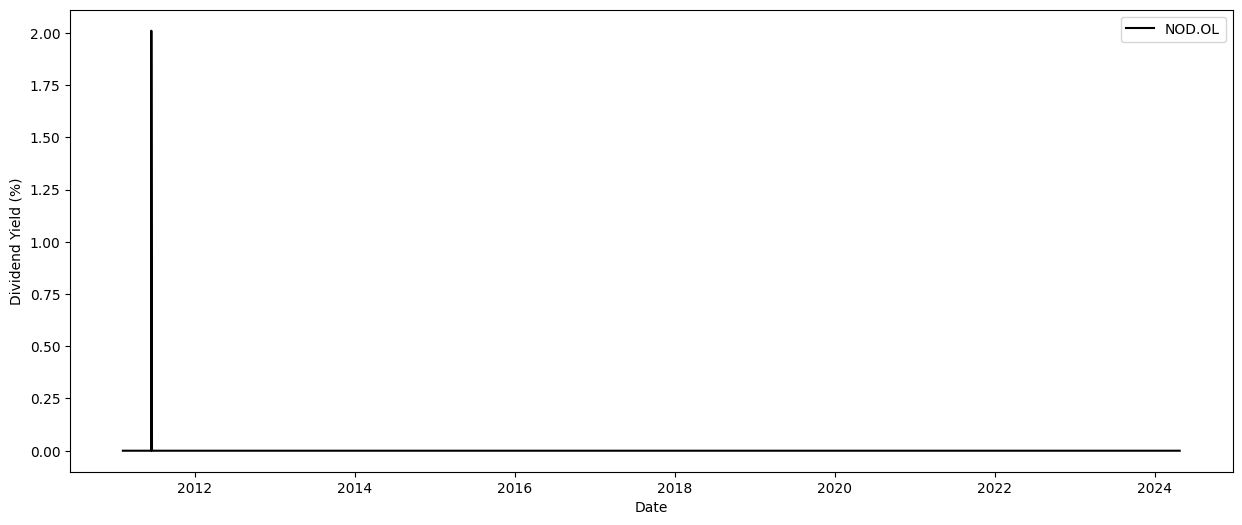

In [17]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.547774
share_price      1.000000
Name: share_price, dtype: float64


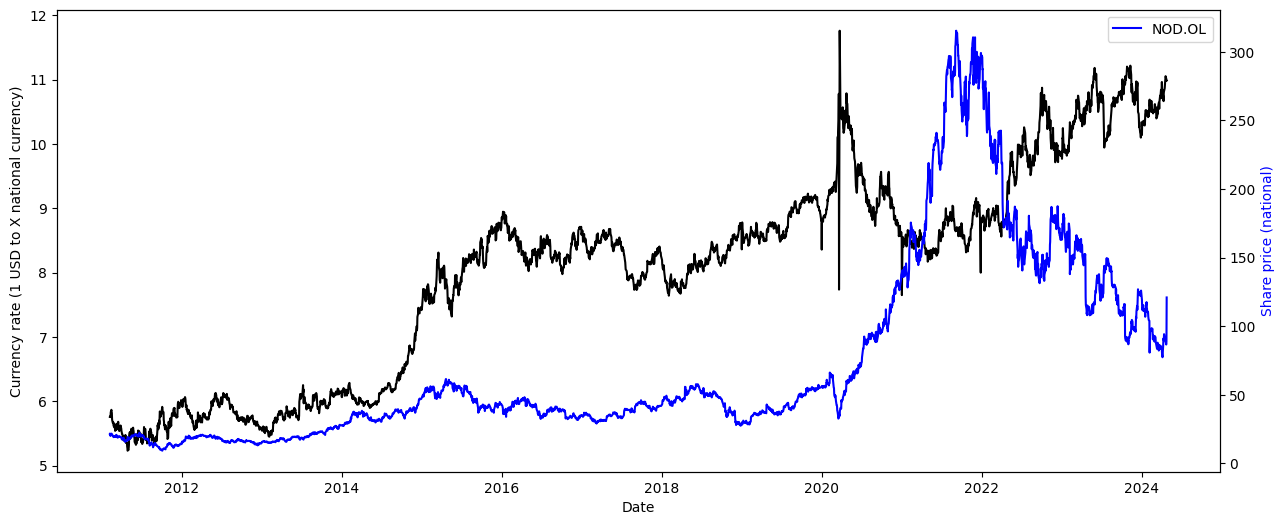

In [18]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

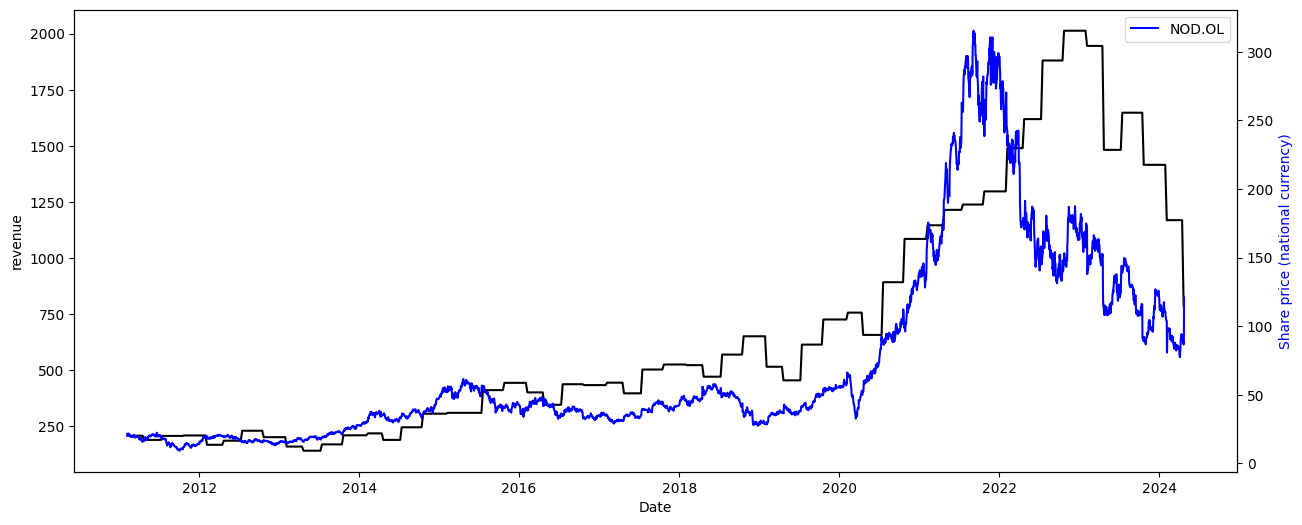

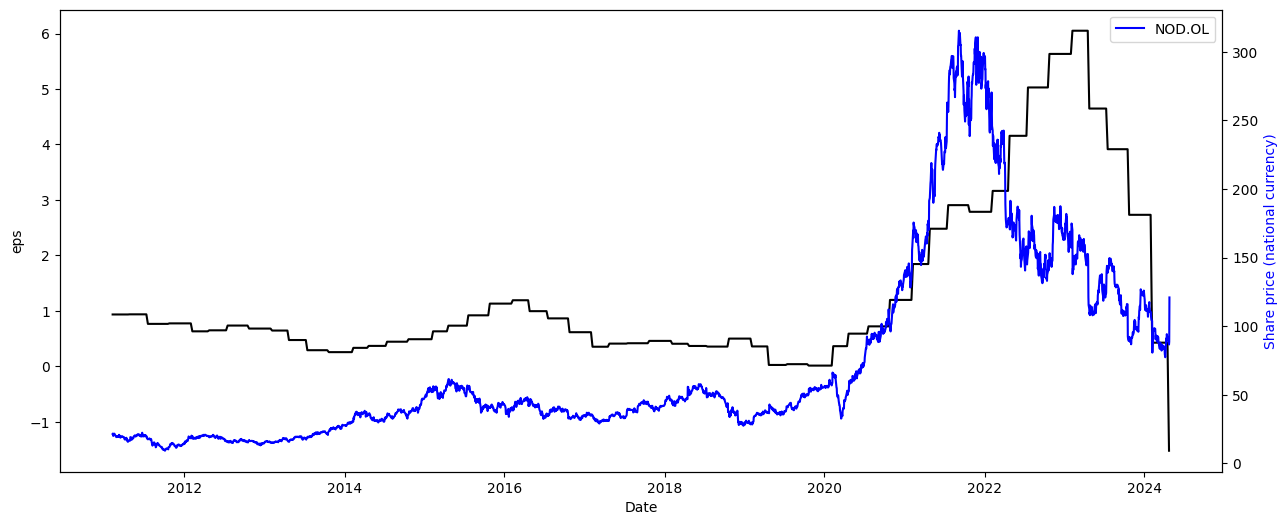

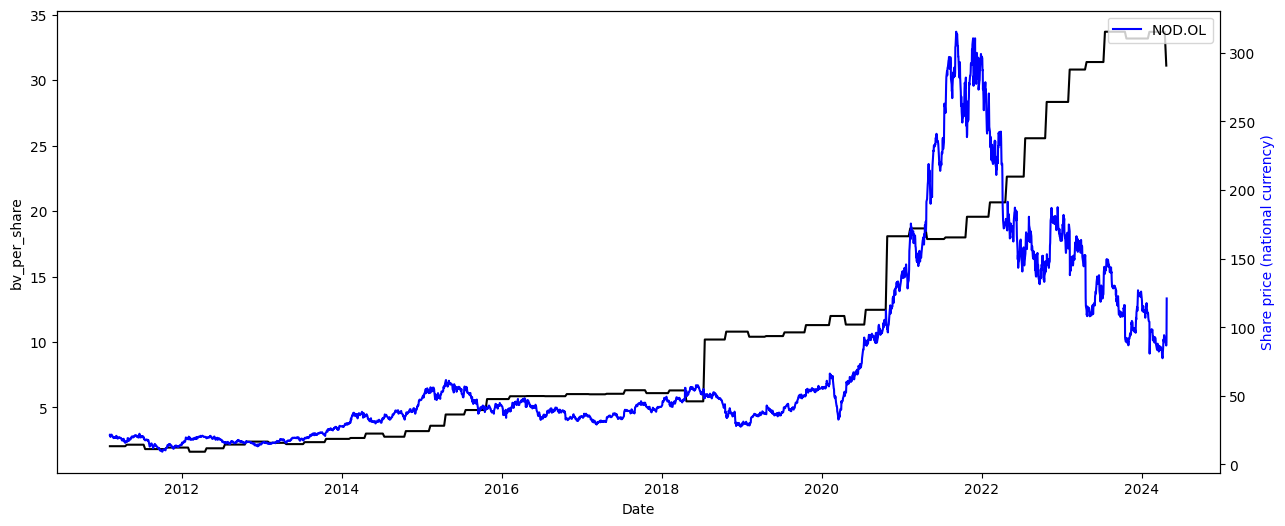

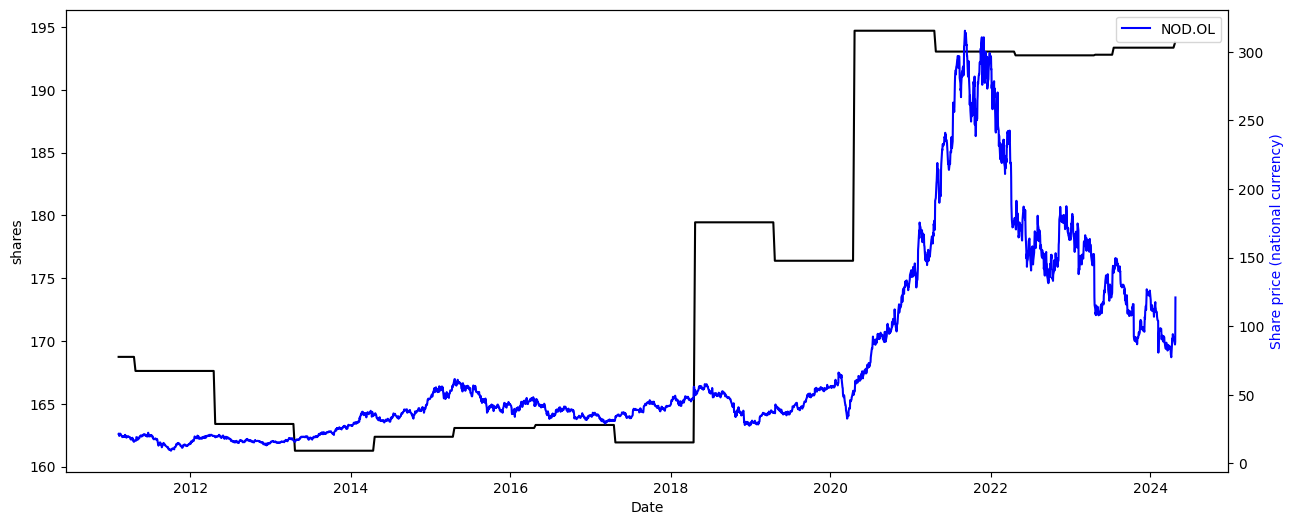

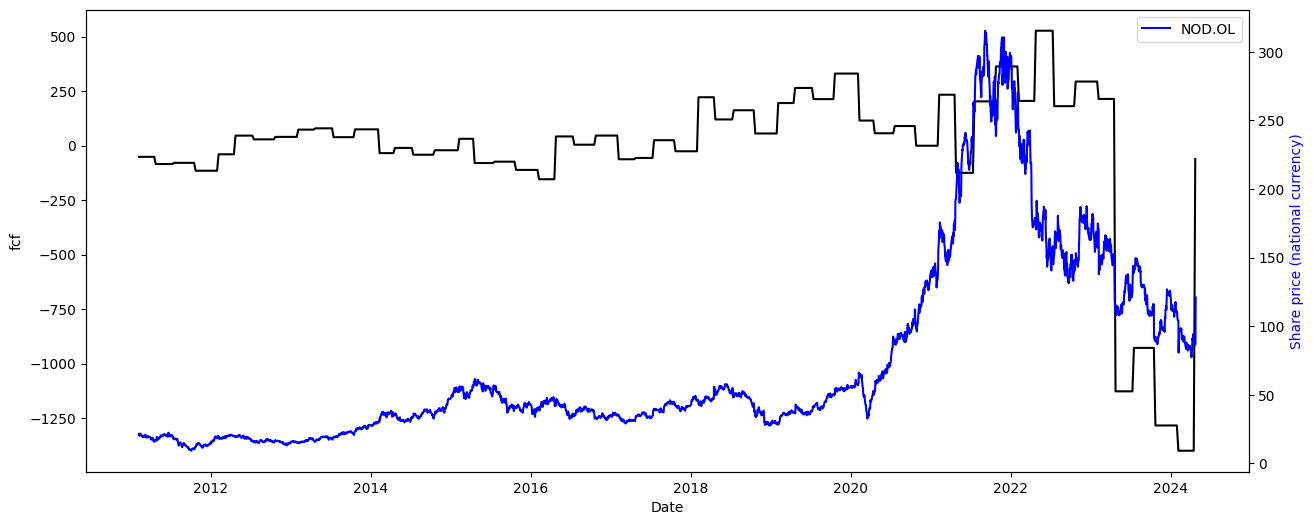

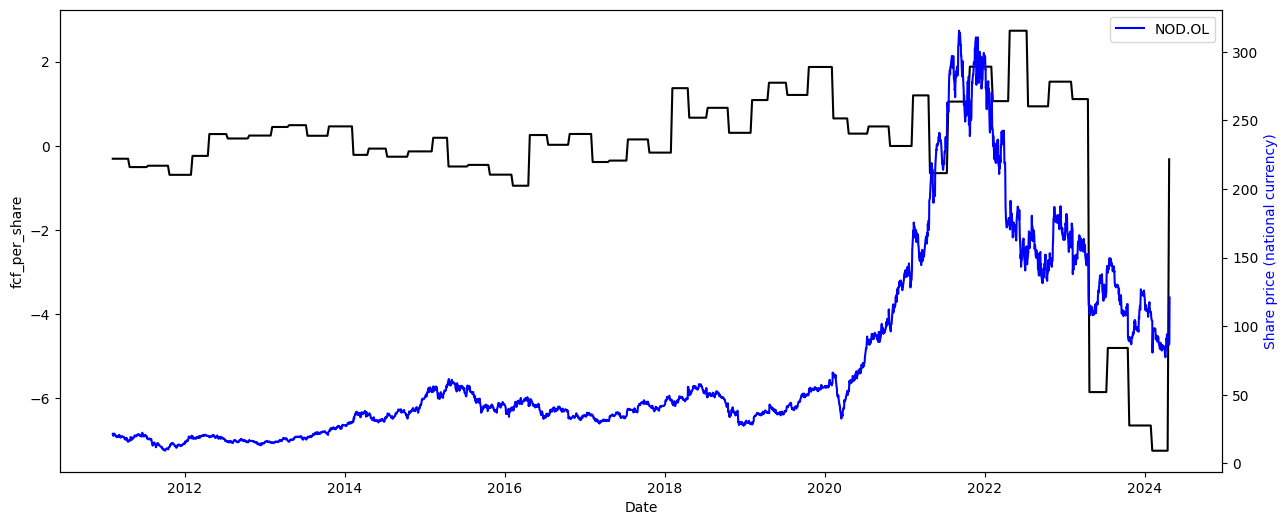

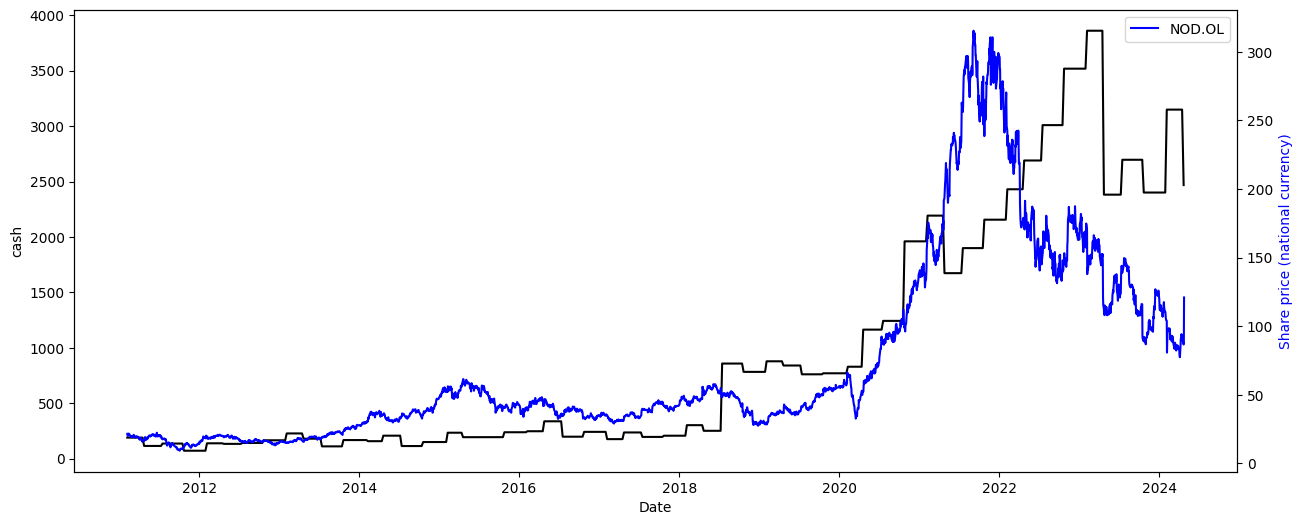

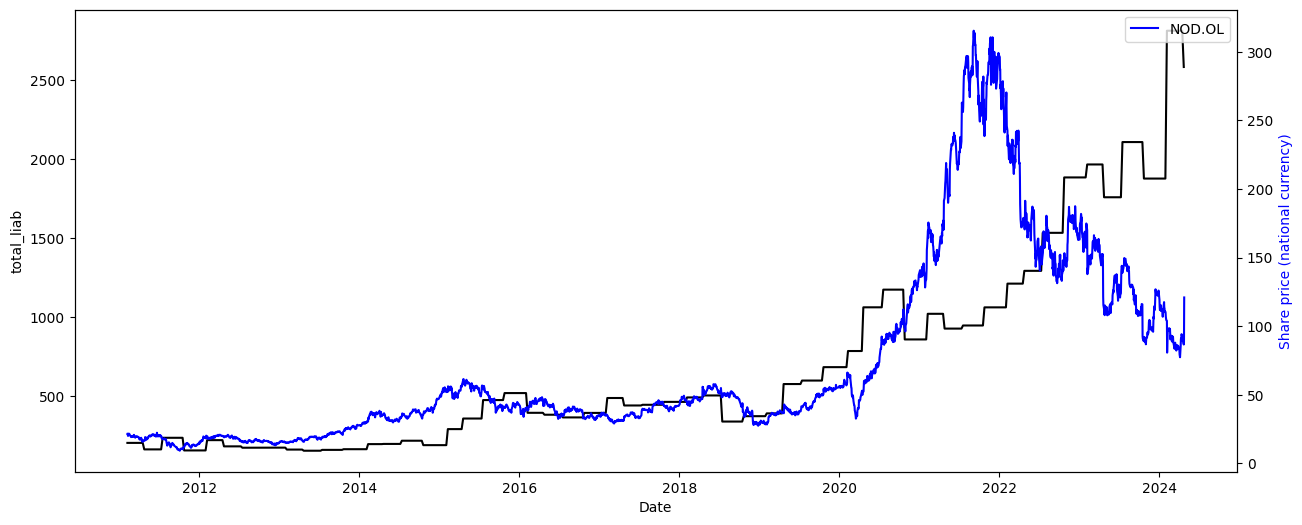

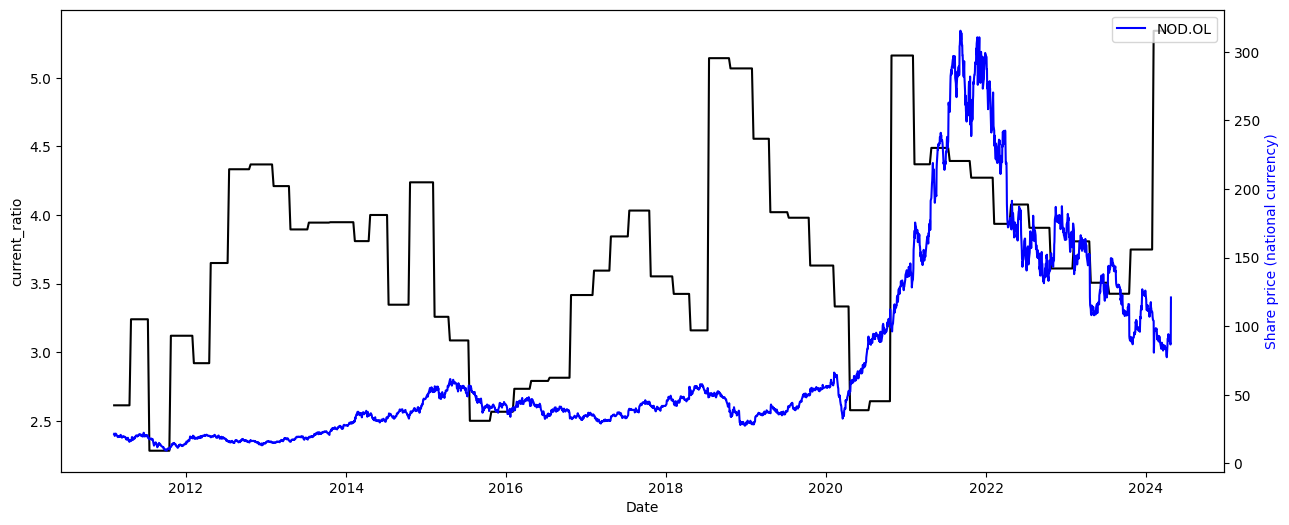

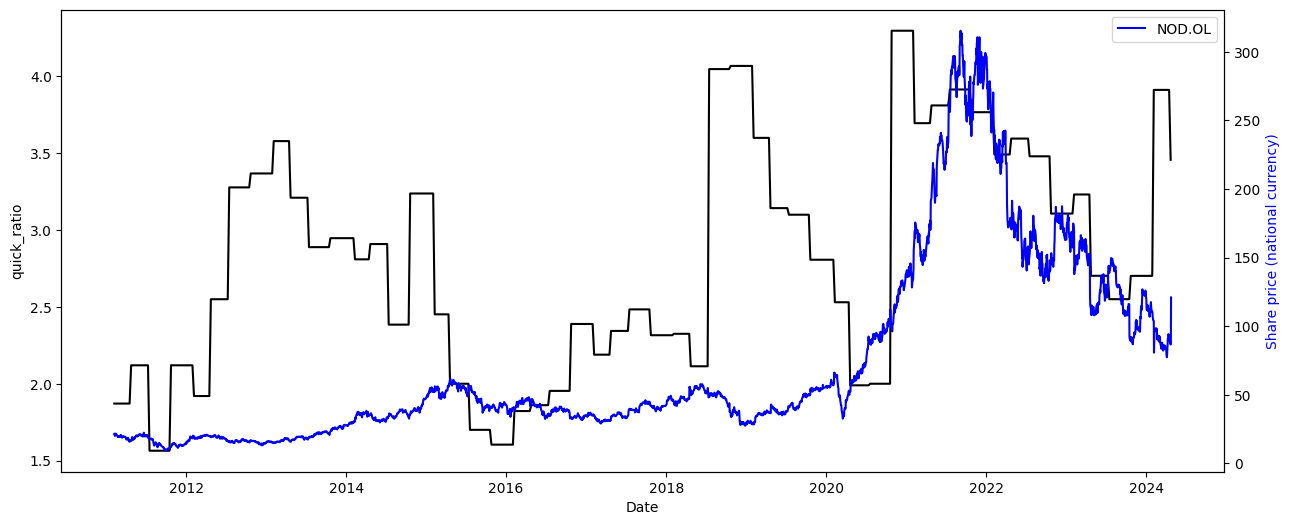

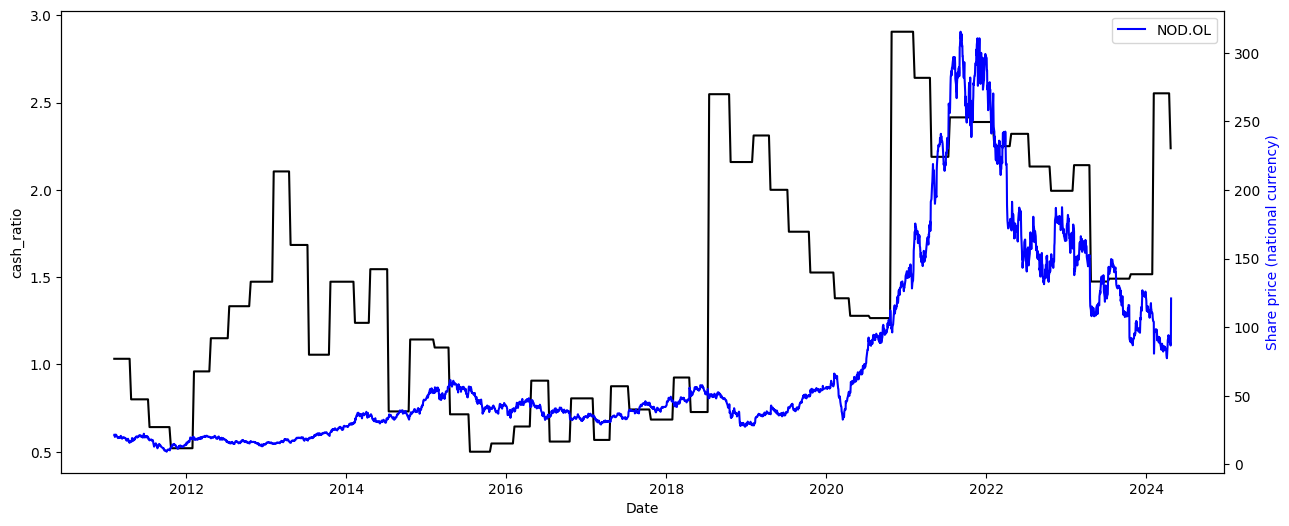

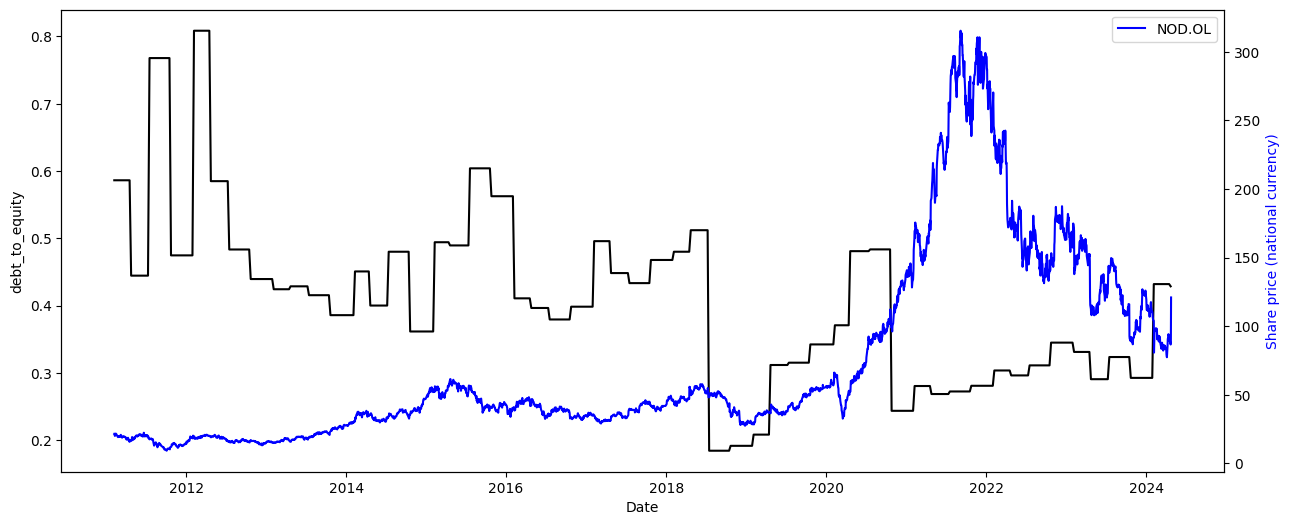

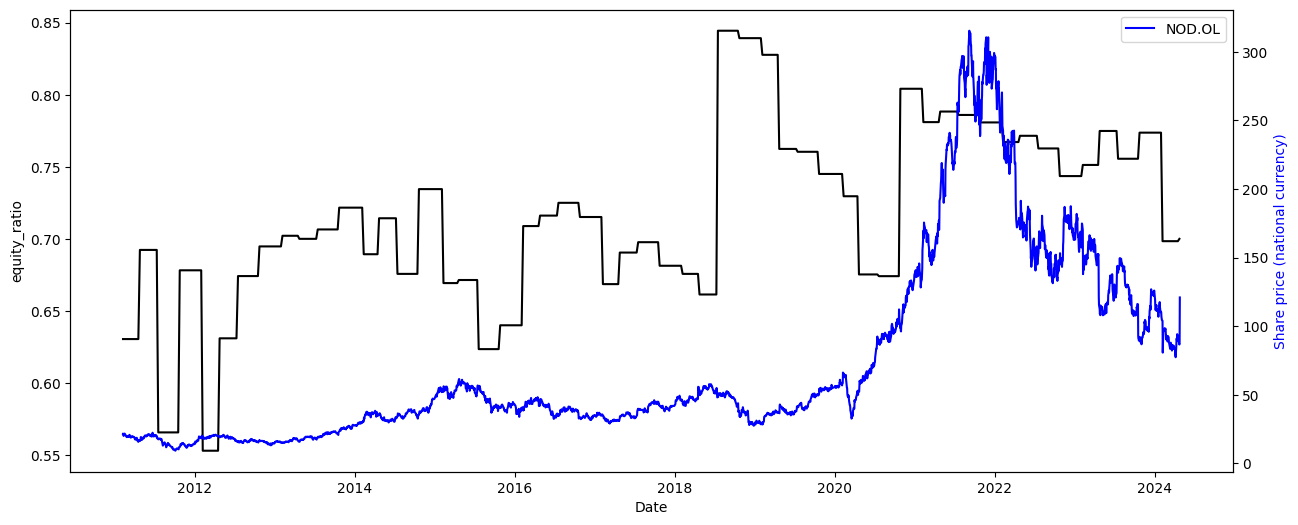

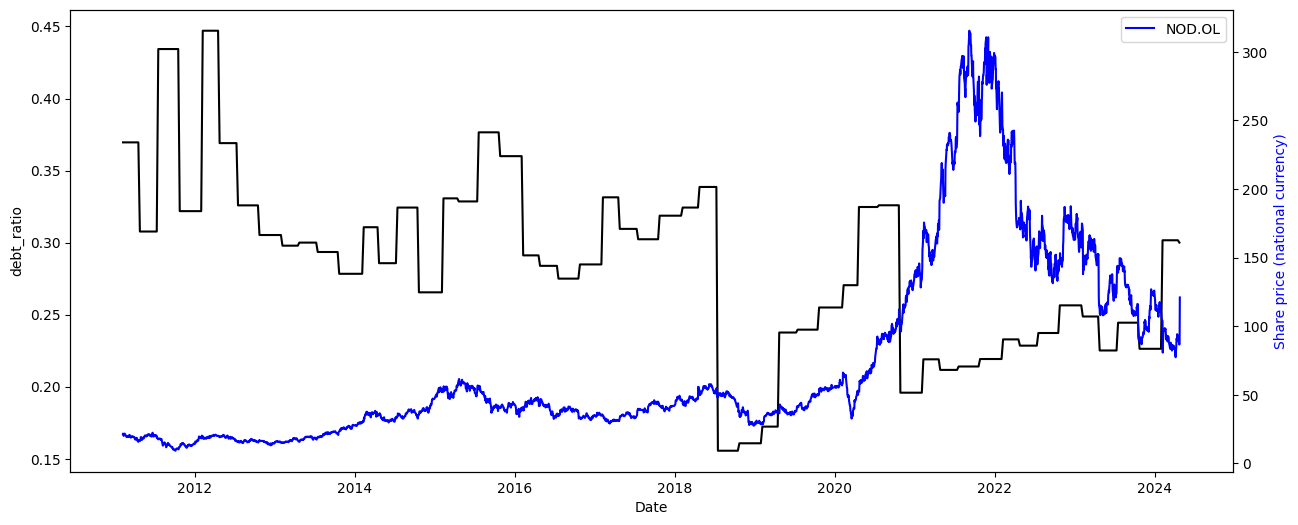

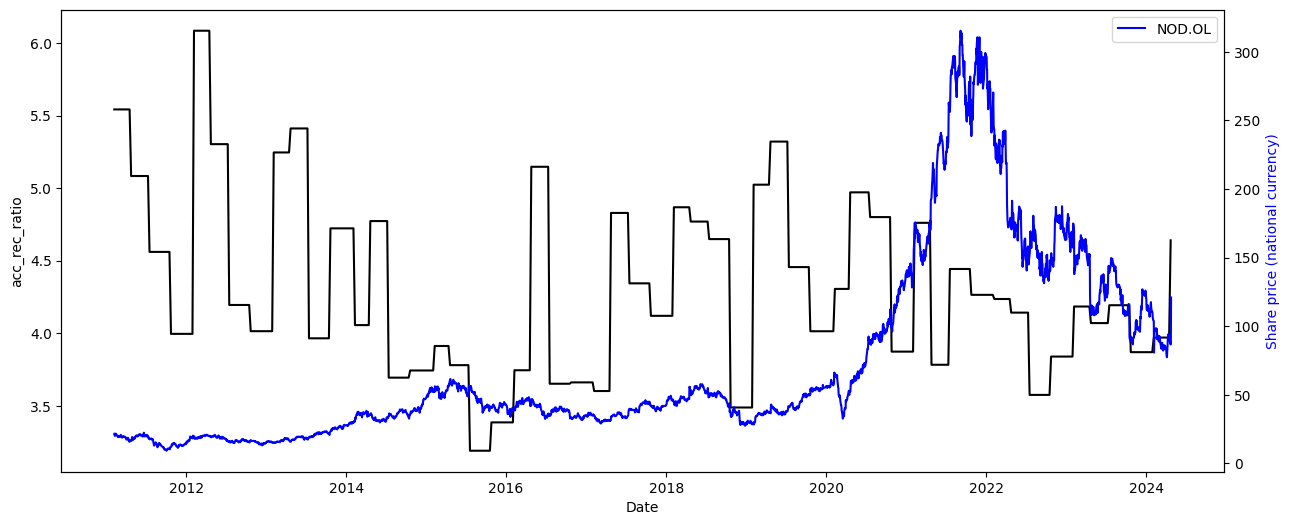

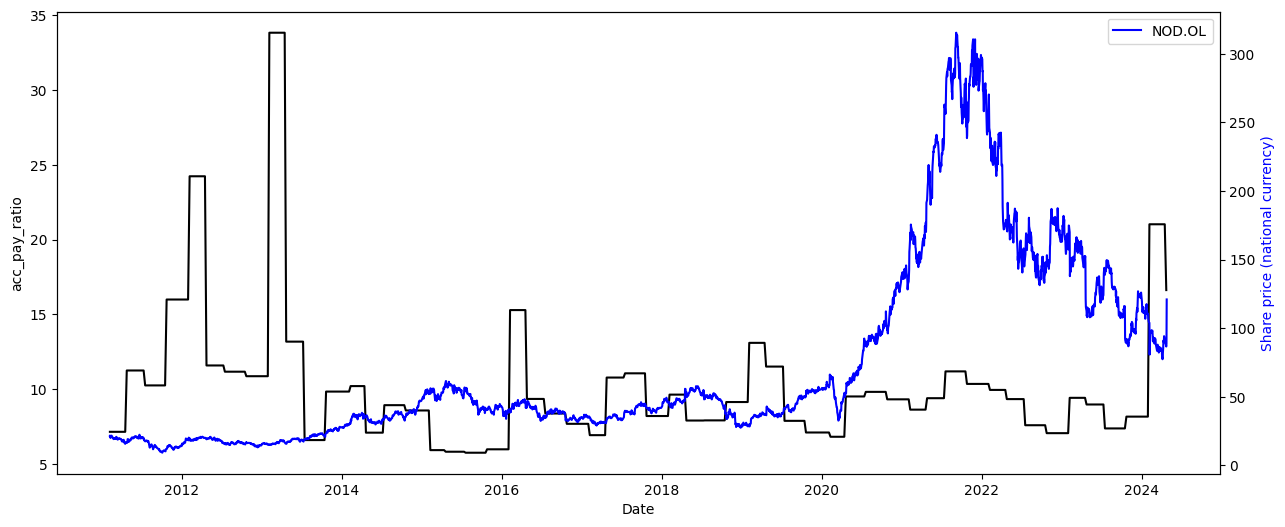

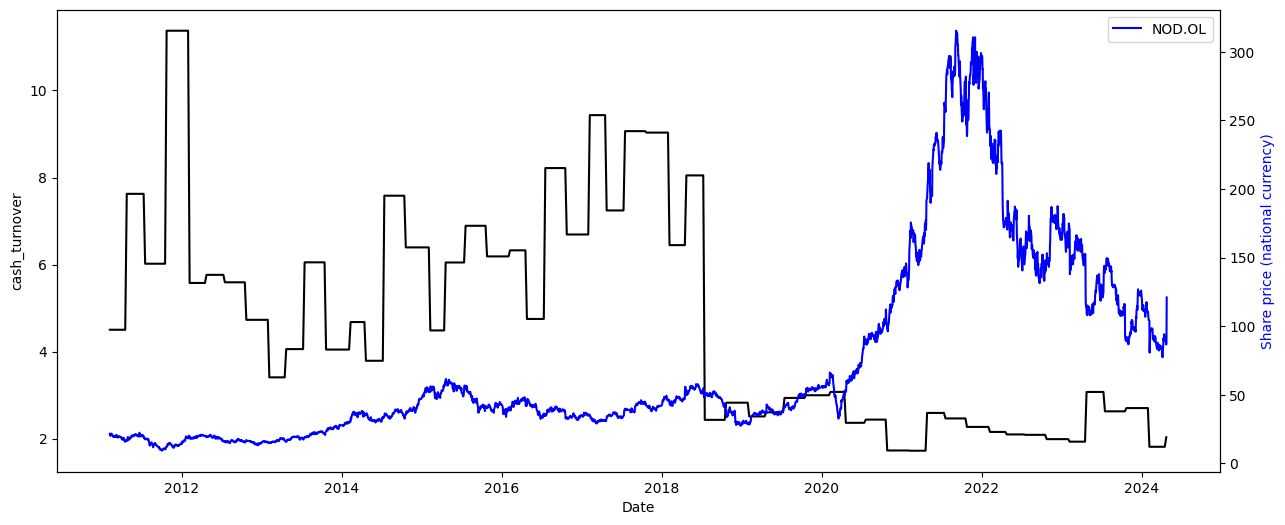

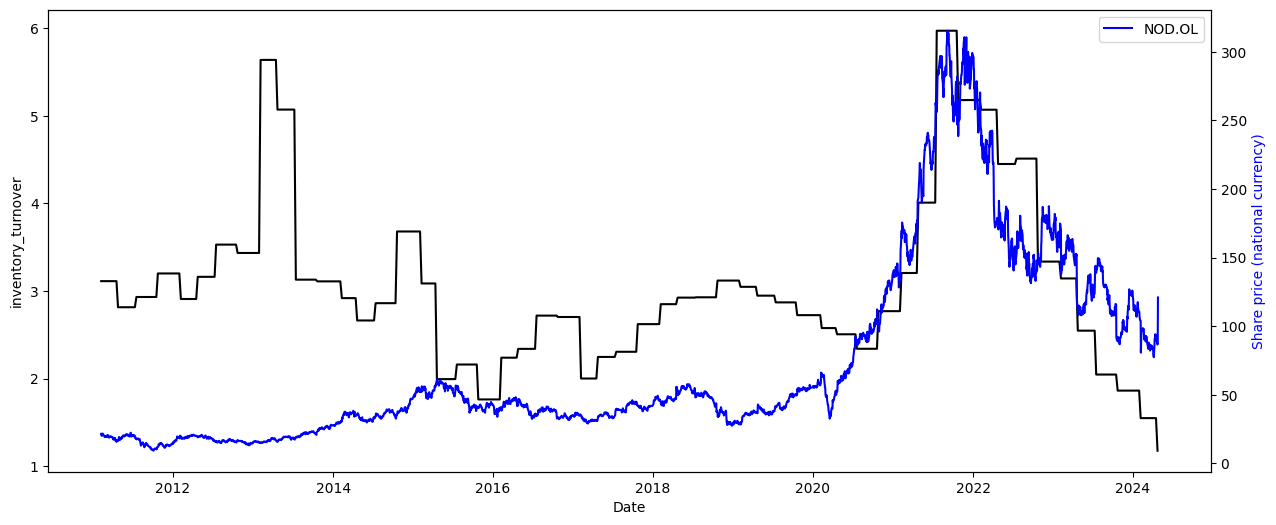

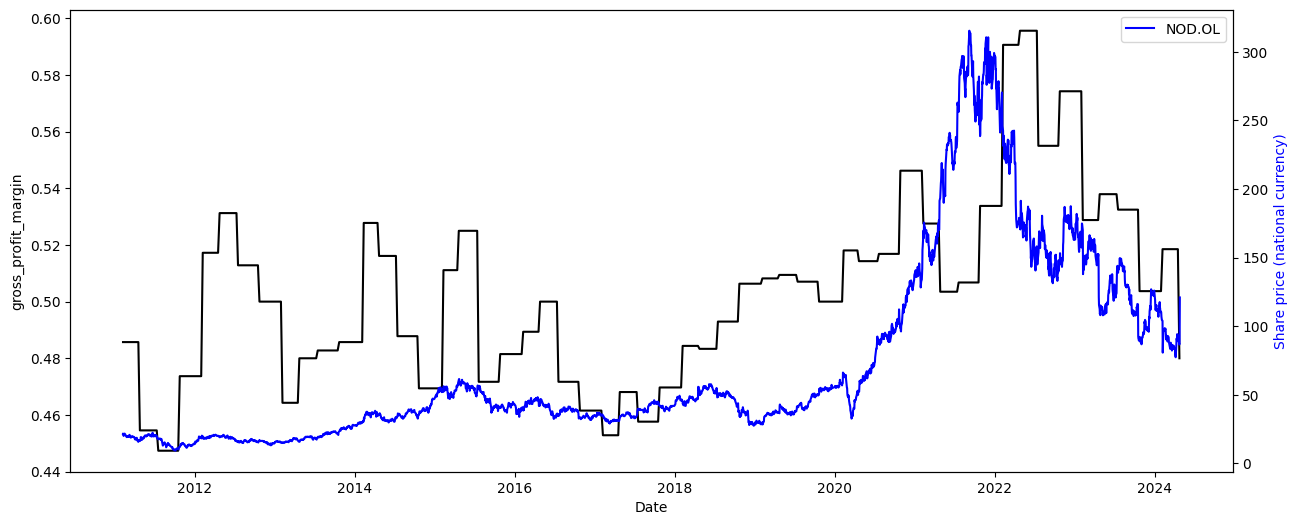

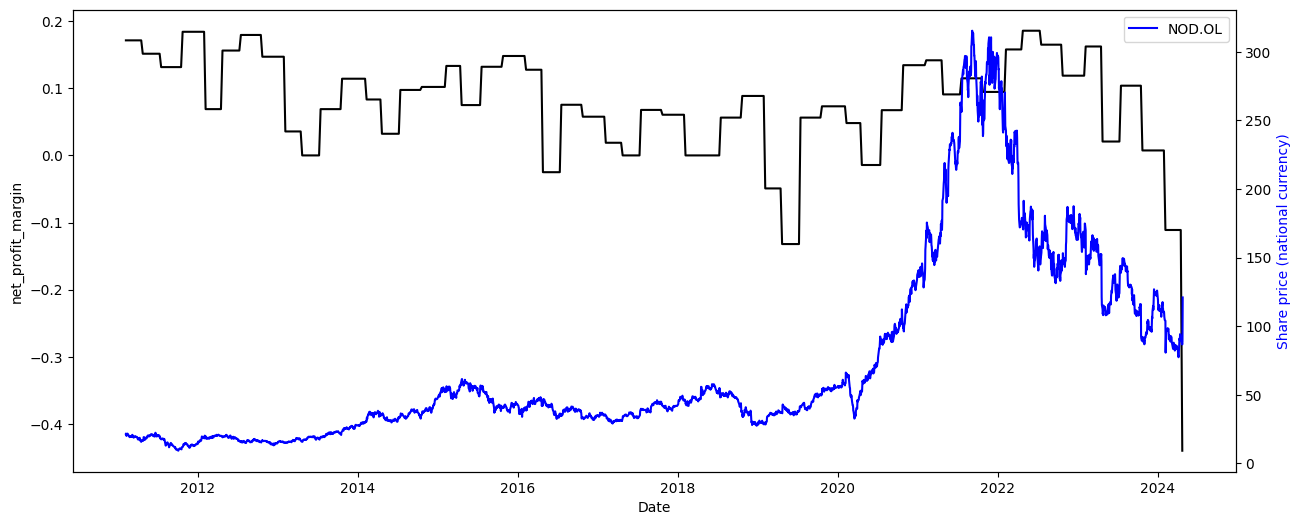

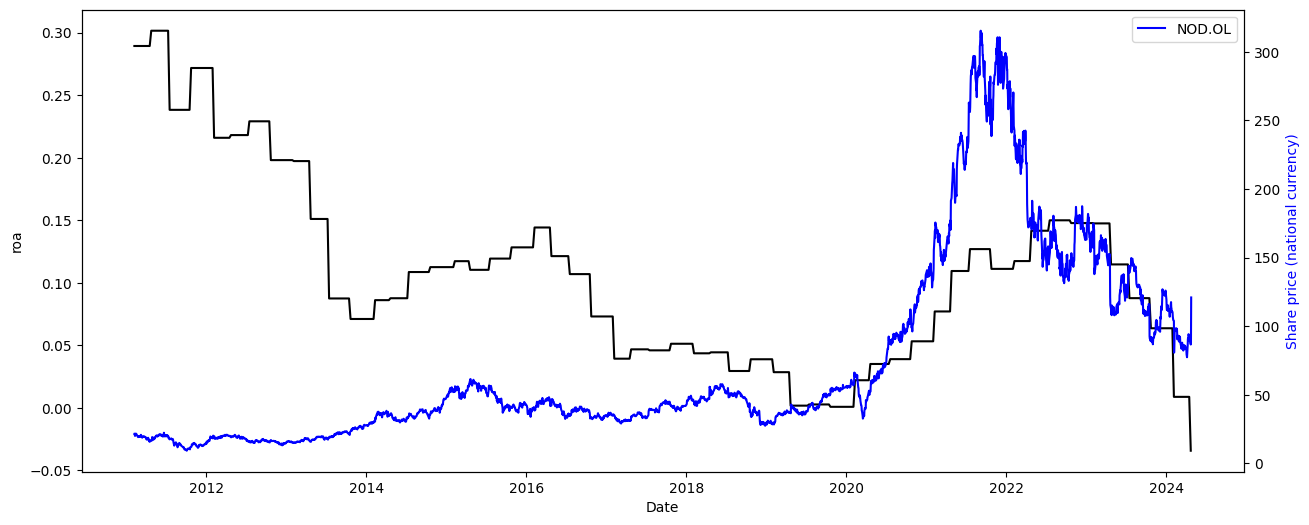

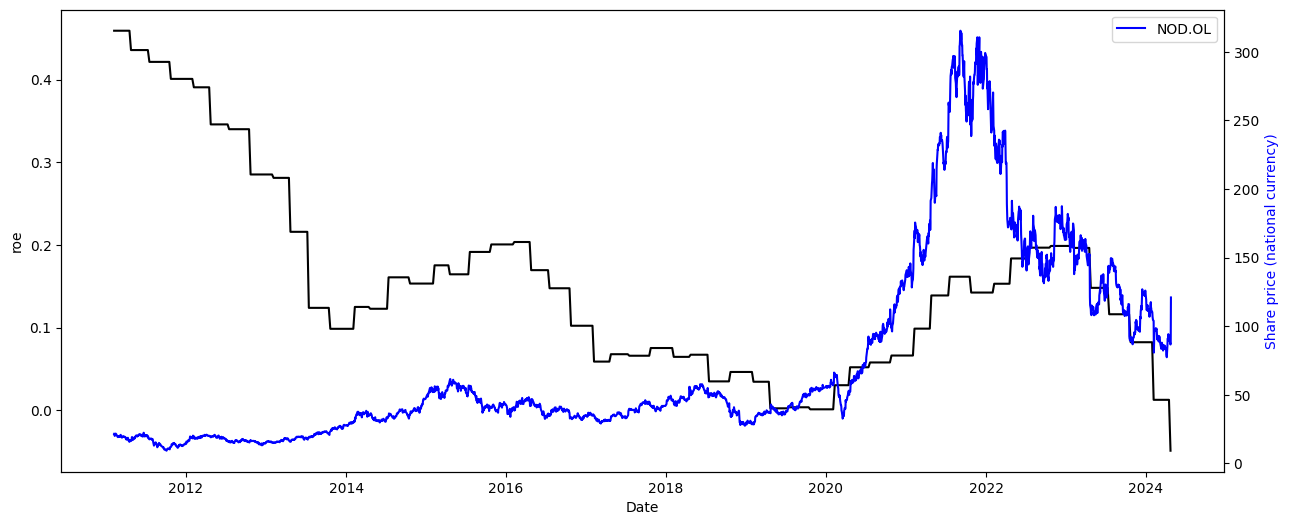

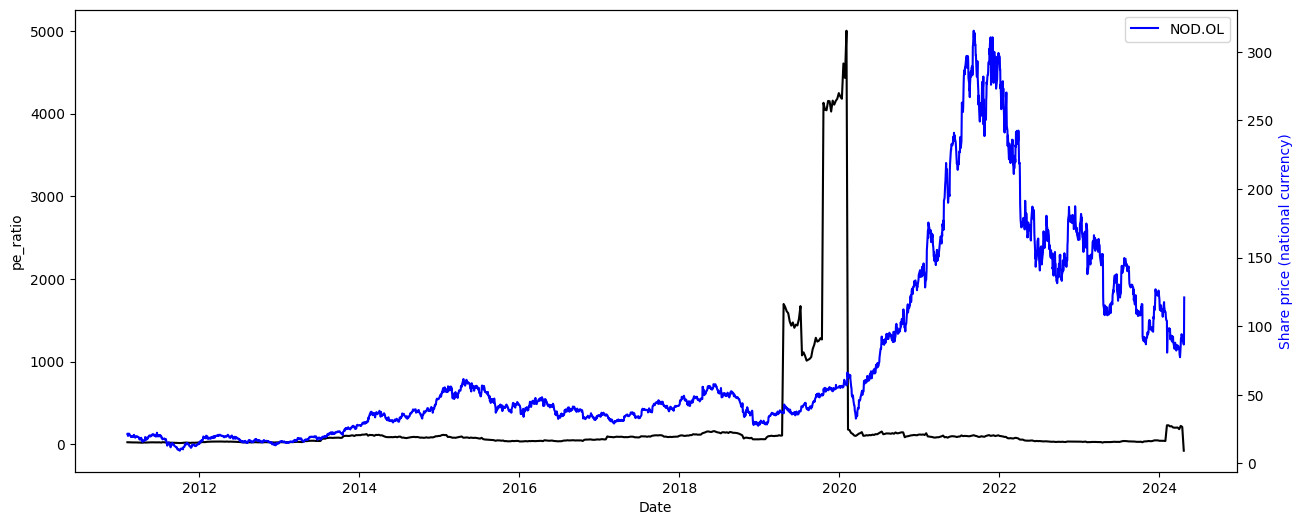

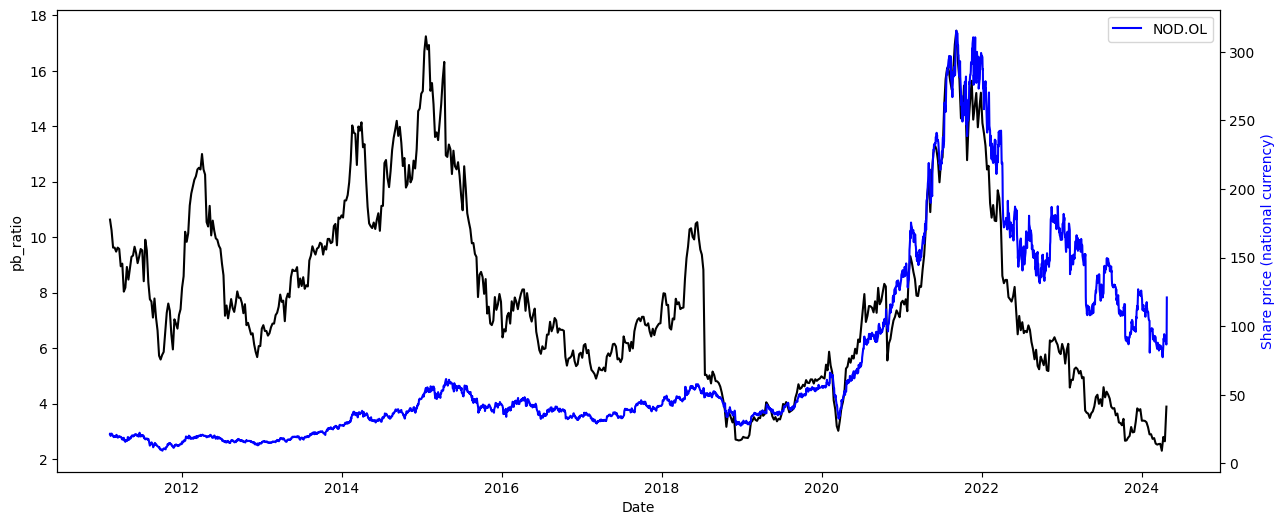

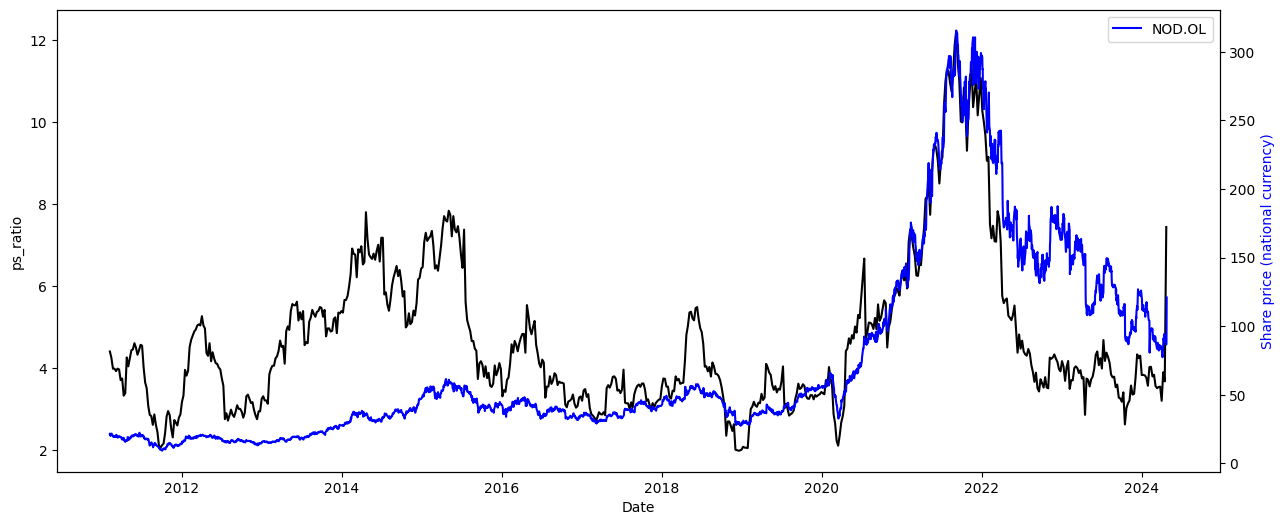

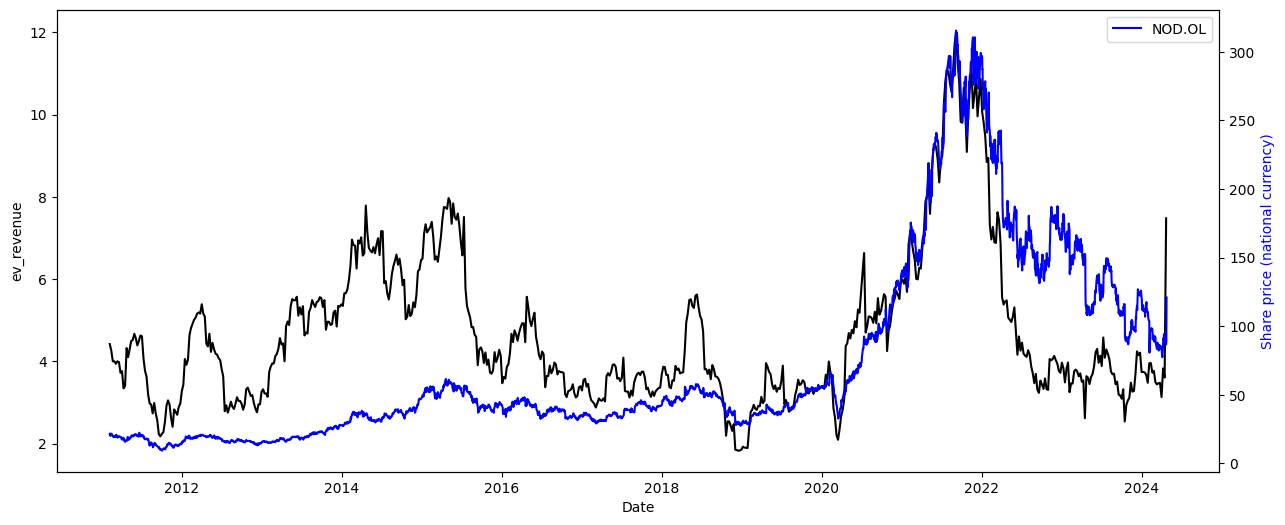

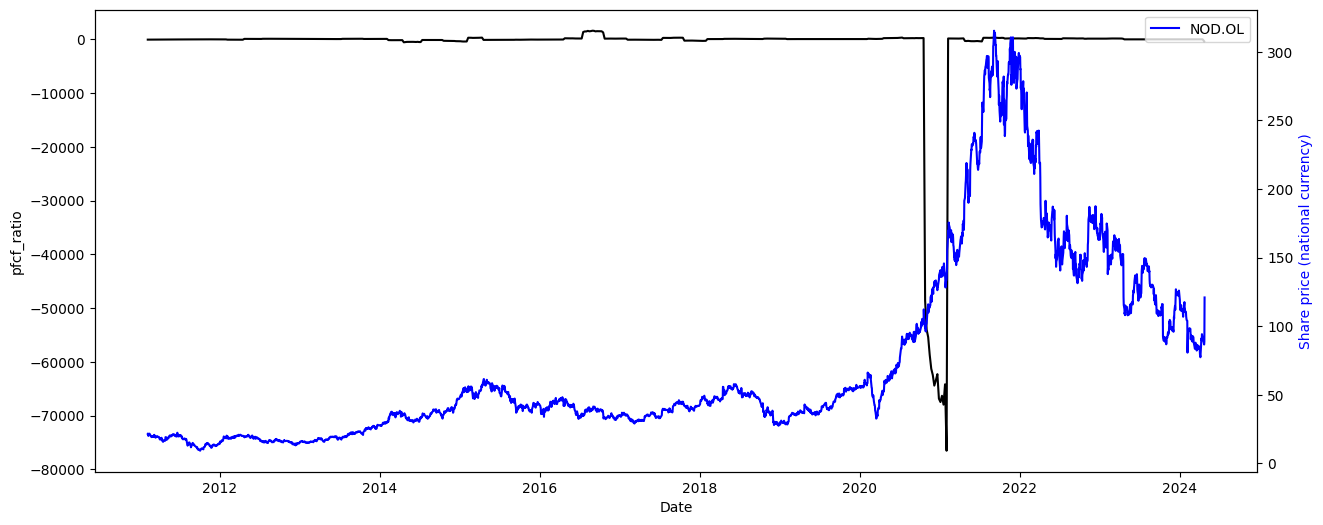

In [19]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

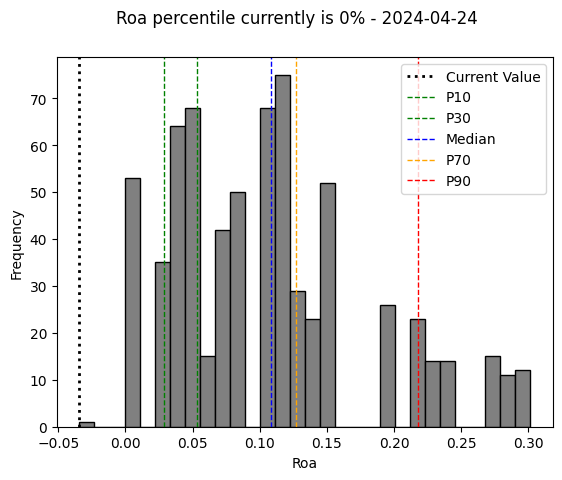

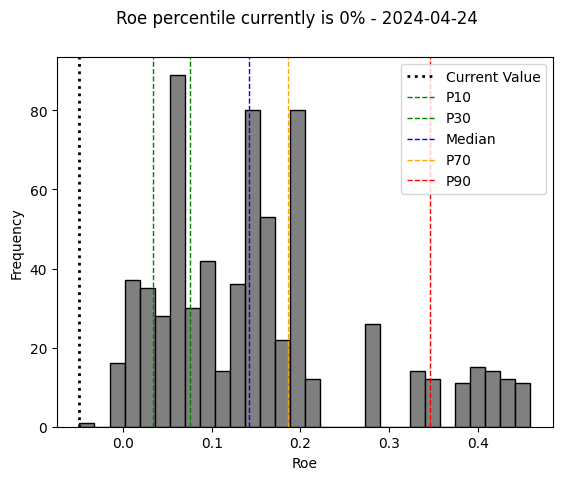

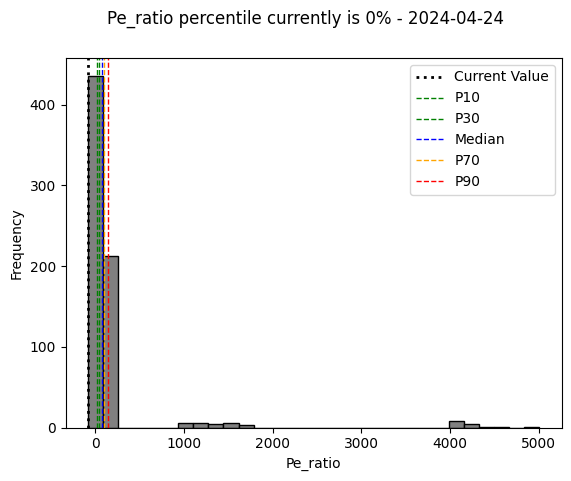

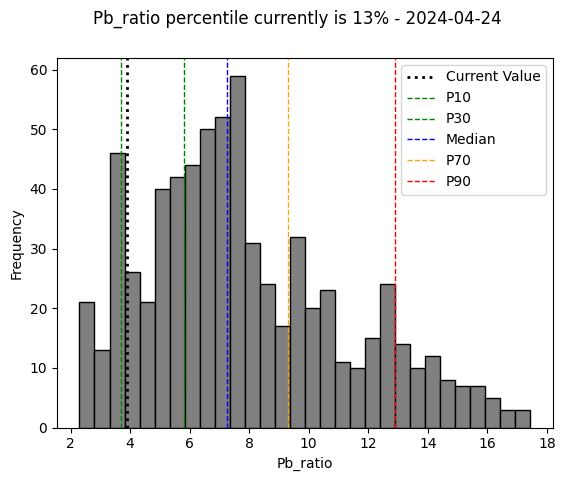

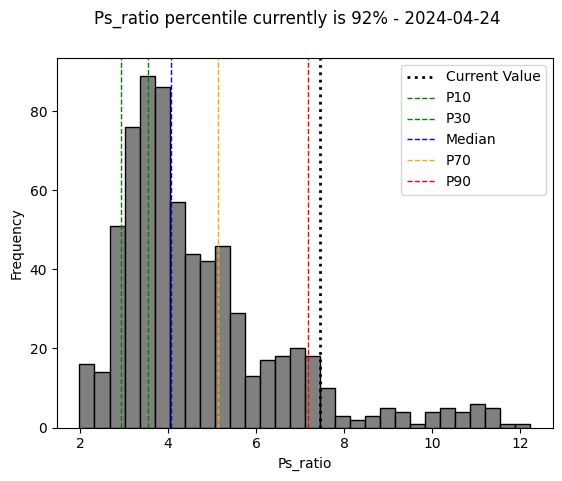

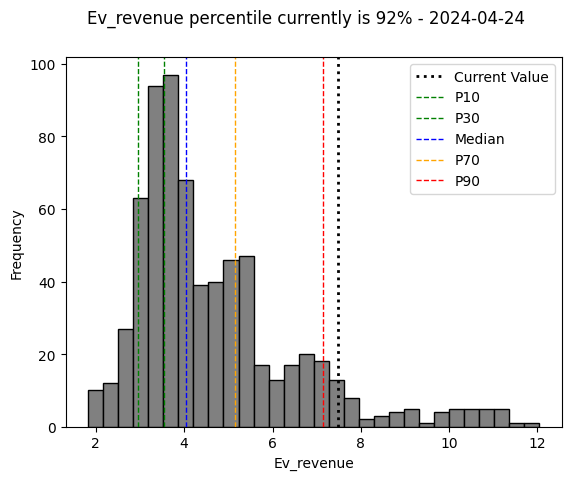

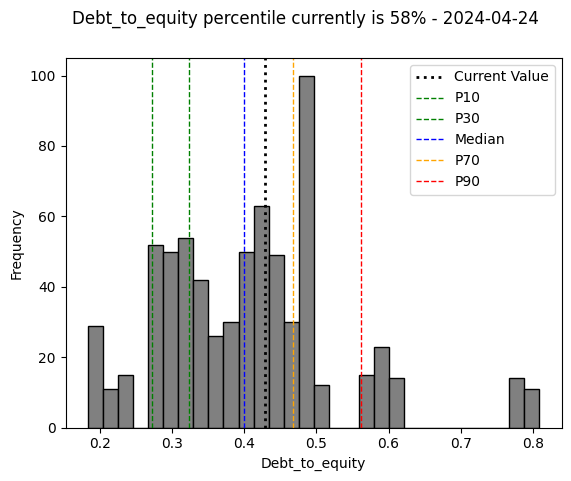

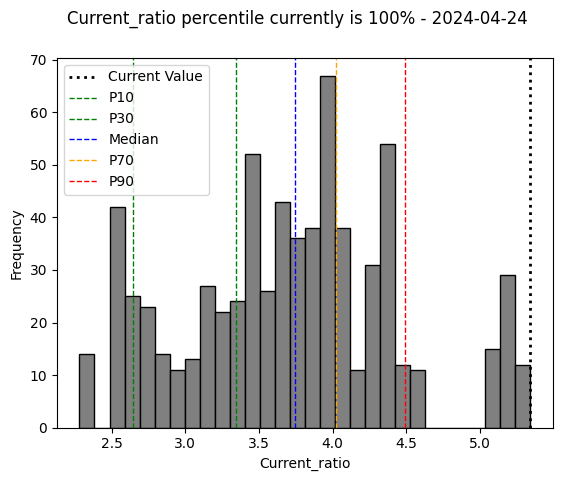

In [20]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [21]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.988791,-0.350366,0.319271,0.006367,0.019027,0.455272,-0.311512
roe,0.988791,1.000000,-0.325971,0.310532,-0.039481,-0.022182,0.561463,-0.370692
pe_ratio,-0.350366,-0.325971,1.000000,-0.197041,-0.122608,-0.128870,-0.140810,0.035696
pb_ratio,0.319271,0.310532,-0.197041,1.000000,0.803099,0.828441,0.247268,-0.103033
ps_ratio,0.006367,-0.039481,-0.122608,0.803099,1.000000,0.997725,-0.179928,0.154300
ev_revenue,0.019027,-0.022182,-0.128870,0.828441,0.997725,1.000000,-0.128786,0.112791
debt_to_equity,0.455272,0.561463,-0.140810,0.247268,-0.179928,-0.128786,1.000000,-0.687066
current_ratio,-0.311512,-0.370692,0.035696,-0.103033,0.154300,0.112791,-0.687066,1.000000
